### Ejercicio

A partir del mismo conjunto de datos y las funciones `explained_variance_score` y `LinearRegression` encuentre el mejor modelo de dos variables para predecir el precio de una casa en Boston. Para esto utilice como metrica la explained `variance`, teniendo en cuenta que es necesario hacer varias veces el corte training/test.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

In [2]:
boston = datasets.load_boston()

In [3]:
boston_df = pd.DataFrame(boston.data, columns=boston['feature_names'])
boston_df = boston_df.assign(PRICE=boston.target)

In [4]:
def get_evs(data_set, target = 'PRICE'):
    regresion = linear_model.LinearRegression()
    
    names = list(data_set.columns)
    names.remove(target)
    names2 = list(names)
    
    results = {}
    
    for name in names:
        if names2:
            names2.remove(name)
        for name2 in names2:
            X_train, X_test, Y_train, Y_test = train_test_split(data_set[[name, name2]], 
                                                        data_set[target], test_size=0.25)
            regresion.fit(X_train,Y_train.values.reshape(-1,1)) 
            Y_predict = regresion.predict(X_test)
            ev = explained_variance_score(Y_test, Y_predict)
            results["%s %s"%(name, name2)] = ev
            
    return results

In [5]:
hist = {}
values = {}
for i in range(100):
    results = get_evs(boston_df)
    result = sorted(results, key = results.get, reverse=True)[0]
    value = results[result]
    if result in hist:
        hist[result] += 1
        values[result].append(value)
    else:
        hist[result] = 1
        values[result] = [value]
        
for key in values:
    values[key] = sum(values[key])/len(values[key])

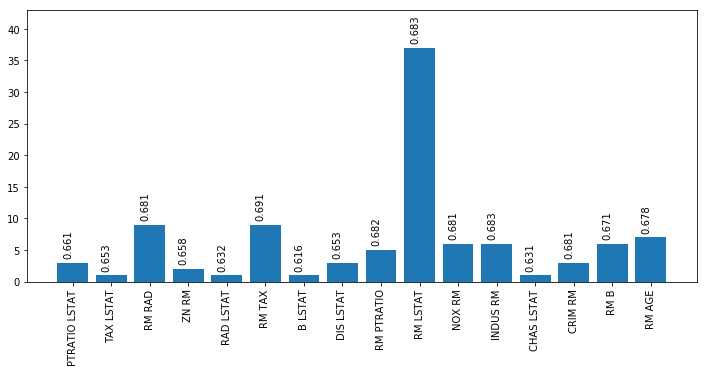

In [6]:
N = len(hist)
hist_values = list(hist.values())
keys = list(hist.keys())

fig = plt.figure(figsize=(12, 5))
plt.bar(range(N), hist_values)
plt.xticks(range(N), keys, rotation='vertical')

for i in range(N):
    plt.text(i-0.25, hist_values[i] + 4, "%.3f"%values[keys[i]], rotation = 'vertical')

plt.ylim(0, max(hist_values) + 6)
plt.show()